<h1>OBJETIVO: Sobreviventes do naufrágio do Titanic</h1>
<p>O objetivo é prever quais possuem melhor capacidade de sobrevivência dada às suas descrições fornecidas pelo dataset como idade, classe, cabine e etc.</p>
<p>Para realizar as previsões, teremos a fase de análise exploratória, limpeza de dados, aferições, treinamento do dataset, teste dos dados e submissão</p>

In [1]:
#Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np 

#Para impedir as mensagens de Warning
import warnings
warnings.filterwarnings('ignore')

#Para plotagem de gráficos
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#Importando alguns modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.model_selection import KFold



In [2]:
#Carregando os datasets. Eles já vieram separados entre treio e teste no desafio
#Os datasets encontram-se na mesma pasta
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Verificando a estrutura do dataset e como ela está organizada.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Verificando o tamanho do dataset:
train.shape

(891, 12)

In [5]:
'''
Analisando as estatísticas numéricas.
'''
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
'''
Verificando a quantidade de dados nulos em cada coluna.
Existem quase 700 valores nulos de uma única coluna, portanto, simplesmente excluir não é 
uma boa opção.
'''
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
'''
Existem muitos valores nulos. Na coluna "Age", referente a idade, não se pode saber exatamente a 
idade de cada passageiro. Portanto, nesse caso, a solução mais viável é aplicar a média da idade
de todos os passageiros para preencher os valores nulos.
PS.: TODAS AS MUDANÇAS FEITAS NO DATASET DE TREINO, PRECISAM SER FEITAS NO DATASET DE TESTE TAMBÉM
'''

train['Age'].fillna(train["Age"].mean(), inplace = True)
test['Age'].fillna(test["Age"].mean(), inplace = True)

In [8]:
'''
Os valores nulos do dataset sumiram. Ainda existem valores nulos, mas esses serão tratados de maneiras
diferentes logo mais.
'''
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
'''
Como a coluna "Fare" do dataset de treino possui apenas 1 valor nulo, eu simplesmente 
irei substituir esse valor por zero. 
'''


test["Fare"].fillna(0, inplace = True) 

In [11]:
'''
Como a coluna "Embarked" do dataset de treino possui apenas dois valores nulos, eu simplesmente 
deletei essas duas linhas do dataset. 
'''
train.dropna(subset=['Embarked'], how='all', inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
'''
A coluna "Cabin" possui muitos valores nulos e não podemos apenas deletar muitas linhas assim. Seria
muitas perdas de informação. Entretanto, essa feature não tem muita relevância em nossa análise e portanto,
a coluna inteira será deletada completamente. 
'''
del train['Cabin']
del test['Cabin']


<h3>Como visto abaixo, a coluna "Cabin" foi deletada</3>

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<h3>Explorando os dados (Feature Engineering)</h3>
<p>Analisando quais variáveis exercem maior influência nas chances de sobrevivência</p>

In [15]:
'''
Aqui estamos analisando a coluna "Pclass" que demonstra a que classe pertenciam os passageiros.
Sendo 3 classes possíveis, a primeira classe destinada as pessoas mais ricas, a segunda classe
pertencem à pessoas com posses, mas não chegam a fazer parte da nobreza e a terceira classe são
os pobres. Aparentemente, a divisão por classes sociais era algo nocivo já naquela época.Como era
de se esperar, a média de pessoas que sobreviveram nas classes mais baixas
são bem menores, demonstrando o total desprezo pela vida humana se você não pertence as camadas mais
ricas da sociedade. 
Portanto, Pclass é uma feature importante a ser considerada.
'''
print(train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean())

   Pclass  Survived
0       1  0.626168
1       2  0.472826
2       3  0.242363


In [16]:
'''
Aqui o gênero foi analisado. Como era política comum mulheres e crianças serem salvas primeiro,
é evidente que o maior número de sobreviventes são do sexo feminino. "Sex" portanto, é outra 
feature de interesse.
'''
print(train[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean())

      Sex  Survived
0  female  0.740385
1    male  0.188908


In [17]:
'''
Como dito anteriormente, mulheres e crianças eram salvos primeiro. Portanto, a faixa etária em que
os passageiros faziam parte, exerce alguma influência na sobrevivência. Vemos isso abaixo no dataset
de treino
'''

Faixa_etaria = []

for i in train['Age']:
    if i < 11:
        Faixa_etaria.append('Crianca')
    elif i >= 11 and i <= 17:
        Faixa_etaria.append('Adolescente')
    elif i >= 18 and i <= 44:
        Faixa_etaria.append('Adulto')
    else:
        Faixa_etaria.append('Idoso')
        
train['Faixa_etaria'] = Faixa_etaria


In [18]:
'''
Como dito anteriormente, mulheres e crianças eram salvos primeiro. Portanto, a faixa etária em que
os passageiros faziam parte, exerce alguma influência na sobrevivência. Vemos isso abaixo no dataset
de test
'''

Faixa_etaria = []

for i in test['Age']:
    if i < 11:
        Faixa_etaria.append('Crianca')
    elif i >= 11 and i <= 17:
        Faixa_etaria.append('Adolescente')
    elif i >= 18 and i <= 44:
        Faixa_etaria.append('Adulto')
    else:
        Faixa_etaria.append('Idoso')

test['Faixa_etaria'] = Faixa_etaria

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa_etaria
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Adulto
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Idoso
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Idoso
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Adulto
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Adulto


In [21]:
'''
Tivemos um grande número de adultos como passageiros no Titanic, mas essa foi a faixa etária em que 
tivemos menos sobreviventes, como pode ser visto na célula seguinte.
'''
train['Faixa_etaria'].value_counts()

Adulto         662
Idoso          114
Crianca         64
Adolescente     49
Name: Faixa_etaria, dtype: int64

In [22]:
'''
Como era de se esperar, crianças e adolescentes foram a faixa etária em que mais pessoas sobreviveram.
Seguidas pelos idosos.
'''

print(train[["Faixa_etaria","Survived"]].groupby(["Faixa_etaria"], as_index = False).mean())

  Faixa_etaria  Survived
0  Adolescente  0.469388
1       Adulto  0.358006
2      Crianca  0.593750
3        Idoso  0.368421


<h3>Terminando de limpar os dados: </h3>

In [23]:
'''
Deletando o resto das colunas desnecessárias
'''
train.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test.drop(['Name', 'Ticket'], axis = 1, inplace = True)


In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa_etaria
0,1,0,3,male,22.0,1,0,7.2500,S,Adulto
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto
3,4,1,1,female,35.0,1,0,53.1000,S,Adulto
4,5,0,3,male,35.0,0,0,8.0500,S,Adulto


In [25]:
train.shape

(889, 10)

In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa_etaria
0,892,3,male,34.5,0,0,7.8292,Q,Adulto
1,893,3,female,47.0,1,0,7.0000,S,Idoso
2,894,2,male,62.0,0,0,9.6875,Q,Idoso
3,895,3,male,27.0,0,0,8.6625,S,Adulto
4,896,3,female,22.0,1,1,12.2875,S,Adulto


In [27]:
test.shape

(418, 9)

<h3>Visualização de todas dos principais insights vistos até agora:</h3>
<p>Como podemos nos cálculos acima, alguns insights já são possíveis antes de treinar os dados. Primeiro, que a maior quantidade de sobreviventes são do sexo feminino. Outra observação possível é que a maior taxa de sobrevivência são de crianças e adolescentes. Esses dois fatos já eram previsíveis pois era prática comum na época salvar mulheres e crianças primeiro. O que não parece justo é que as pessoas mais ricas, ou seja, aquelas que faziam parte da primeira classe, teve o maior índice de sobrevivência independente da faixa etária ou do gênero.  </p>

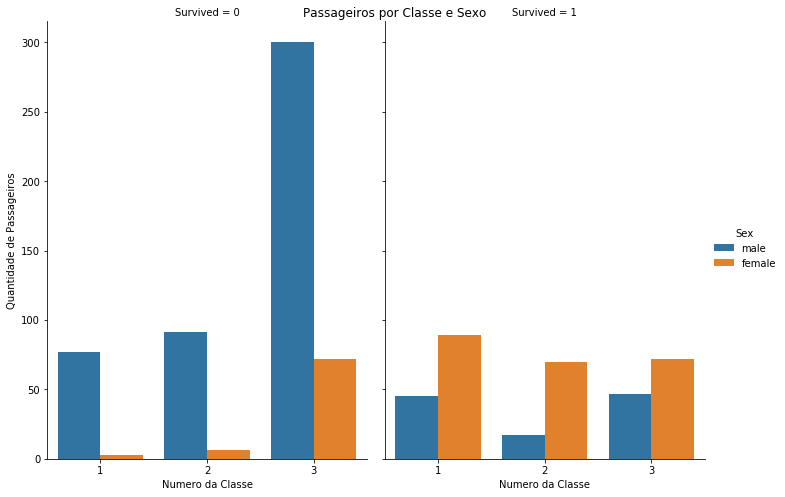

In [28]:
'''
 No gráfico abaixo, temos a esquerda Survived = 0 (não sobreviventes), das 3 classes. A direita, temos
 Survived = 1 ( sobreviventes). Como é possível observar, o número de mulheres sobreviventes é sempre
 maior em todas as classes.
'''


grafico = sns.catplot(x = "Pclass", hue = "Sex", col = "Survived", data = train, kind = "count",
                     height = 7, aspect = 0.7)
grafico.fig.suptitle("Passageiros por Classe e Sexo")
grafico.set_ylabels("Quantidade de Passageiros")
grafico.set_xlabels("Numero da Classe")

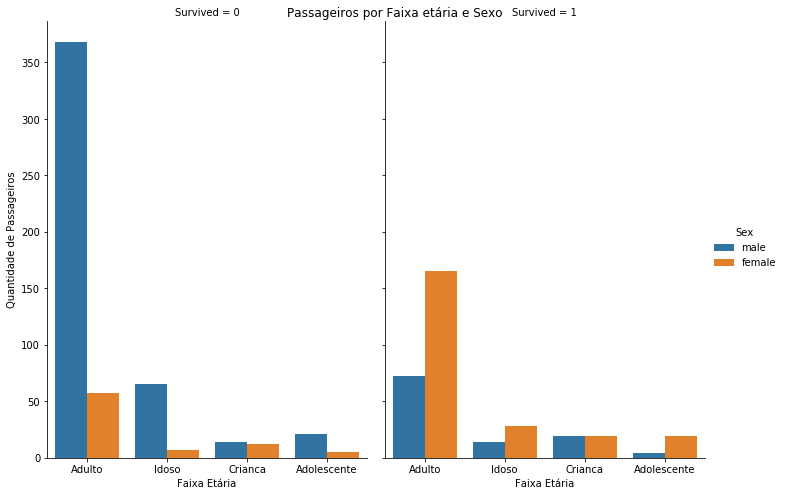

In [29]:
'''
A taxa de sobreviventes entre as crianças é praticamente as mesmas em ambos os gêneros. Isso já era
esperado. 
'''

grafico2 = sns.catplot(x = "Faixa_etaria", hue = "Sex", col = "Survived", data = train, kind = "count",
                     height = 7, aspect = 0.7)
grafico2.fig.suptitle("Passageiros por Faixa etária e Sexo")
grafico2.set_ylabels("Quantidade de Passageiros")
grafico2.set_xlabels("Faixa Etária")

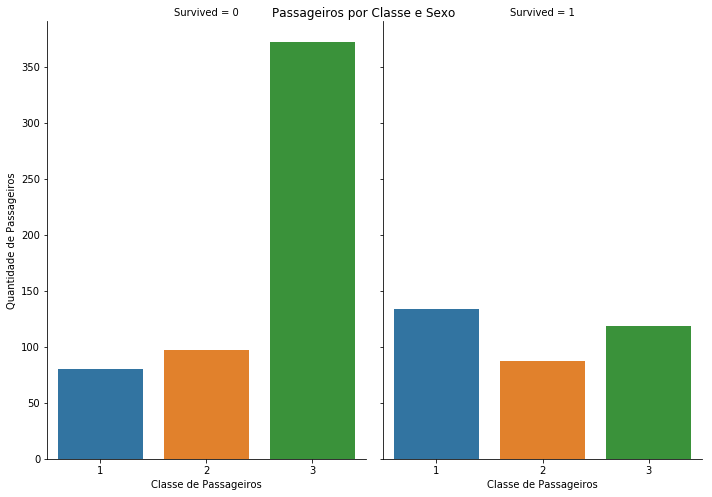

In [30]:

'''
Como dito anteriormente, e agora é possível ver essa diferença claramente, a maior parte dos que não
sobreviveram ao naufrágio são da terceira classe. 
'''

grafico3 = sns.catplot(x = "Pclass", col = "Survived", data = train, kind = "count",
                     height = 7, aspect = 0.7)
grafico3.fig.suptitle("Passageiros por Classe e Sexo")
grafico3.set_ylabels("Quantidade de Passageiros")
grafico3.set_xlabels("Classe de Passageiros")

<h3>Eliminando dados categóricos: </h3>
<p>Como pode ser visto abaixo, ainda possuímos muitos dados categóricos. Como os modelos preditivos em que eles serão treinados são sensíveis a esse tipo de coisa, iremos transformar esse dataset para que ele esteja estruturado de maneira adequada.</p>

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa_etaria
0,1,0,3,male,22.0,1,0,7.2500,S,Adulto
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto
3,4,1,1,female,35.0,1,0,53.1000,S,Adulto
4,5,0,3,male,35.0,0,0,8.0500,S,Adulto


In [32]:
#Conferindo o tipo de cada coluna. Alguns tipos provavelmente serão alterados.
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked         object
Faixa_etaria     object
dtype: object

In [33]:
dt_train = train.copy()
dt_test = test.copy()

In [34]:
'''
Mudando a ordem das colunas para deixar a variável alvo na frente.
'''
dt_train = dt_train.reindex(columns=['Survived', 'PassengerId', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Faixa_etaria'])


In [35]:
dt_train.head()

,Survived,PassengerId,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Faixa_etaria
0,0,1,3,22.0,male,1,0,7.2500,S,Adulto
1,1,2,1,38.0,female,1,0,71.2833,C,Adulto
2,1,3,3,26.0,female,0,0,7.9250,S,Adulto
3,1,4,1,35.0,female,1,0,53.1000,S,Adulto
4,0,5,3,35.0,male,0,0,8.0500,S,Adulto


In [36]:
'''
Aqui, estou usando uma técnica conhecida para transformar dados categóricos em valores númericos, chamado
"OneHotEncoder". Ele cria várias outras colunas, mas ao menos agora podemos usar nos modelos preditivos.

'''

import category_encoders as ce

ce_ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
dt_train = ce_ohe.fit_transform(dt_train)


In [37]:
dt_test = ce_ohe.fit_transform(dt_test)

In [38]:
dt_train.head()

,Survived,PassengerId,Pclass,Age,Sex_male,Sex_female,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Faixa_etaria_Adulto,Faixa_etaria_Idoso,Faixa_etaria_Crianca,Faixa_etaria_Adolescente
0,0,1,3,22.0,1,0,1,0,7.2500,1,0,0,1,0,0,0
1,1,2,1,38.0,0,1,1,0,71.2833,0,1,0,1,0,0,0
2,1,3,3,26.0,0,1,0,0,7.9250,1,0,0,1,0,0,0
3,1,4,1,35.0,0,1,1,0,53.1000,1,0,0,1,0,0,0
4,0,5,3,35.0,1,0,0,0,8.0500,1,0,0,1,0,0,0


<h3>Hora de testar alguns algoritmos:</h3>
<p>Depois de limpar os dados e transformá-los em valores numéricos, é hora de testar alguns modelos preditivos com o objetivo de encontrar o modelo que seja capaz de prever quem foram os sobreviventes do naufrágio com uma melhor acurácia.</p>

In [39]:
'''
Essas serão as variáveis que serão passadas aos modelos preditivos para testes. Em y, temos apenas
a variável alvo (Survived), e em X temos todas as outras colunas.
'''
X = np.array(dt_train.iloc[:,1:])
y = np.array(dt_train['Survived'])



In [40]:

from sklearn import model_selection
from sklearn.model_selection import cross_val_score


'''
Aqui os modelos preditivos estão sendo testados em função de sua performance EM TODAS AS VARIÁVES
DE INTERESSE. No final, somente 1 modelo preditivo será escolhido para ser usado. O método utilizado
é dividir o dataset em 10 pedaços e calcular a acurácia de cada pedaço. No final calcularemos média 
da acurácia desses 10 pedaços. Quanto maior a média final, melhor o modelo preditivo. Importante 
salientar que o treinamento não está sendo feito aqui. Apenas estimativas de quais modelos funcionam
melhor. 

OBS.: COMO PODE TER NOTADO, ESSE É O MESMO ALGORITMO QUE EU USEI EM MEU TCC. COMO ELE FUNCIONA, NÃO
TEM PORQUE NÃO USÁ-LO.
'''

models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=500, random_state = 0)))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('NAIVE_BAYES', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
n_folds = 10


for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines, testing_lines in kf.split(X,y):
       
        kf = model_selection.KFold(10, shuffle=True, random_state = 1)
        X_train, X_test = X[training_lines], X[testing_lines]
        y_train, y_test = y[training_lines], y[testing_lines]

        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))

        hit_rate += cv_results.mean()
        
    final_accuracy = hit_rate/10   
    print("Média das 10 acurácias: ",final_accuracy)
    print()

NameError: name 'SVC' is not defined

<h3>Random Forest</h3>
<p>Como visto acima, o algoritmo de Random Forest foi o que se saiu melhor nos testes de estimativa de acurácia. Mas por que isso ocorreu? Isso ocorre por causa da maneira que a Random Forest funciona. Primeiro ela é melhor em datasets cujas variáveis possuem pouca correlação com a variável alvo (demonstrado logo abaixo pelo mapa de calor). Outra razão é porque a Random Forest nada mais é do que um conjunto com centenas de árvores de decisão, cada um com suas próprias decisões. As possibilidades de se gerar uma estimativa mais acurada a partir de inúmeras decisões é bem maior do que a acurácia de apenas 1 decisão mesmo que essa possua uma probabilidade maior. Usei como referência um artigo desse link: https://towardsdatascience.com/understanding-random-forest-58381e0602d2</p>

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa_etaria
0,1,0,3,male,22.0,1,0,7.2500,S,Adulto
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto
3,4,1,1,female,35.0,1,0,53.1000,S,Adulto
4,5,0,3,male,35.0,0,0,8.0500,S,Adulto


In [42]:
'''
Somente os itens que serão usados no treinamento serão correlacionados.
'''
fields_to_correlate = 'Survived Pclass Sex Age SibSp Parch Fare Embarked Faixa_etaria'.split()

In [43]:
def correlation_in_league():
    train.replace(' ', np.nan, inplace=True)
    corr = train[fields_to_correlate].corr()
    print(corr.round(2))

correlation_in_league()

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.33   0.08   0.02 -0.55
Age          -0.07   -0.33  1.00  -0.23  -0.18  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.18   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


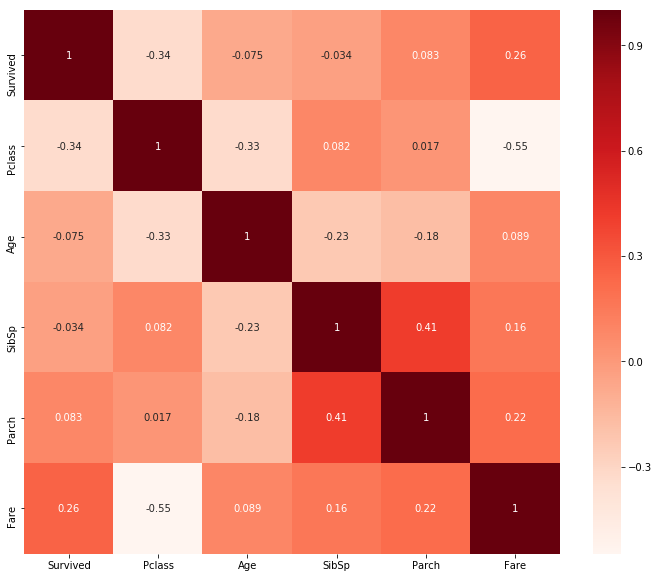

In [44]:
'''
O mapa de calor abaixo mostra a baixa correlação entre a variável alvo (Survived) e as outras features.
Somente a variável "Fare", mostrou alguma correlação, como era de se esperar. Fare alto == ricos. 
Ou seja, temos realmente um ambiente favorável para usar Random Forest.
'''

plt.figure(figsize=(12,10))
corr = train[fields_to_correlate].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [45]:
dt_train.head()

,Survived,PassengerId,Pclass,Age,Sex_male,Sex_female,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Faixa_etaria_Adulto,Faixa_etaria_Idoso,Faixa_etaria_Crianca,Faixa_etaria_Adolescente
0,0,1,3,22.0,1,0,1,0,7.2500,1,0,0,1,0,0,0
1,1,2,1,38.0,0,1,1,0,71.2833,0,1,0,1,0,0,0
2,1,3,3,26.0,0,1,0,0,7.9250,1,0,0,1,0,0,0
3,1,4,1,35.0,0,1,1,0,53.1000,1,0,0,1,0,0,0
4,0,5,3,35.0,1,0,0,0,8.0500,1,0,0,1,0,0,0


In [46]:
dt_test.head()

,PassengerId,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Embarked_C,Faixa_etaria_Adulto,Faixa_etaria_Idoso,Faixa_etaria_Adolescente,Faixa_etaria_Crianca
0,892,3,1,0,34.5,0,0,7.8292,1,0,0,1,0,0,0
1,893,3,0,1,47.0,1,0,7.0000,0,1,0,0,1,0,0
2,894,2,1,0,62.0,0,0,9.6875,1,0,0,0,1,0,0
3,895,3,1,0,27.0,0,0,8.6625,0,1,0,1,0,0,0
4,896,3,0,1,22.0,1,1,12.2875,0,1,0,1,0,0,0


<h3>Treinando o Dataset</h3>
<p>Finalmente vamos calcular o dataset para poder prever quem foram os sobreviventes.</p>

In [47]:
features = dt_train.drop('Survived', axis = 1)
target = dt_train['Survived']



In [48]:
features.dtypes

PassengerId                   int64
Pclass                        int64
Age                         float64
Sex_male                      int64
Sex_female                    int64
SibSp                         int64
Parch                         int64
Fare                        float64
Embarked_S                    int64
Embarked_C                    int64
Embarked_Q                    int64
Faixa_etaria_Adulto           int64
Faixa_etaria_Idoso            int64
Faixa_etaria_Crianca          int64
Faixa_etaria_Adolescente      int64
dtype: object

In [49]:
'''
Aplicando o modelo Random Forest
'''
forest = RandomForestClassifier(n_jobs = 4, n_estimators=10, random_state = 1)
forest.fit(features,target)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [50]:
#Verificando o score
forest.score(features,target)

0.9820022497187851

In [51]:
dt_train.shape

(889, 16)

In [52]:
dt_train.head()

,Survived,PassengerId,Pclass,Age,Sex_male,Sex_female,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Faixa_etaria_Adulto,Faixa_etaria_Idoso,Faixa_etaria_Crianca,Faixa_etaria_Adolescente
0,0,1,3,22.0,1,0,1,0,7.2500,1,0,0,1,0,0,0
1,1,2,1,38.0,0,1,1,0,71.2833,0,1,0,1,0,0,0
2,1,3,3,26.0,0,1,0,0,7.9250,1,0,0,1,0,0,0
3,1,4,1,35.0,0,1,1,0,53.1000,1,0,0,1,0,0,0
4,0,5,3,35.0,1,0,0,0,8.0500,1,0,0,1,0,0,0


In [53]:
dt_test.shape

(418, 15)

In [54]:
dt_test.head()

,PassengerId,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Embarked_C,Faixa_etaria_Adulto,Faixa_etaria_Idoso,Faixa_etaria_Adolescente,Faixa_etaria_Crianca
0,892,3,1,0,34.5,0,0,7.8292,1,0,0,1,0,0,0
1,893,3,0,1,47.0,1,0,7.0000,0,1,0,0,1,0,0
2,894,2,1,0,62.0,0,0,9.6875,1,0,0,0,1,0,0
3,895,3,1,0,27.0,0,0,8.6625,0,1,0,1,0,0,0
4,896,3,0,1,22.0,1,1,12.2875,0,1,0,1,0,0,0


In [55]:
'''
Preparando para submeter os valores ao Kaggle
'''
submissions = pd.DataFrame()
submissions['PassengerId'] = dt_test['PassengerId']
submissions['Survived'] = forest.predict(dt_test)

In [57]:
'''
Criando um CSV com os valores para submeter ao Kaggle.
'''
submissions.to_excel('submission.xlsx', index = False)